# Strip Theory

***

Welcome to the first notebook of the _Flight Dynamics and Control_ theme of the _Aerospace Dynamics_ course! If you are not familiar with Python, we suggest you to have a go with the [_Quick Python Intro_](00_Quick_Python_Intro.ipynb) provided as the notebook zero of this series.

In this notebook we are going to look at strip theory, a useful tool for the calculation of the incremental changes of aerodynamic forces exterted by lifting surfaces. We'll first present the theoretical background and then we'll apply the method to the case of an aircraft that needs to counteract the imbalance caused by the loss of fuel from one half of the wing.

## Theoretical background

***

The aerodynamic forces are an important component of the equations of motions of an aircraft, which are the set of equations that describe the motion of the aircraft. The resultant of the aerodynamic forces can be decomposed along the body axes of the aircraft, as shown in the image below.

![Sketch of the resultant of the aerodynamic forces decomposed along the body axes of the aircraft.](resources/01_AerodynamicForces.PNG "Aerodynamic forces")

The distribution of the aerodynamic forces along the different parts of the aircraft give rise to the moments that act on the aircraft, which are also important to describe the motion of the aircraft. Also the moments can be considered along the body axes of the aircraft, as shown in the image below.

![Sketch of the moments that act on the aircraft.](resources/01_Moments.PNG "Moments")

If you wanted to make a very accurate calculation of the aerodynamic forces acting on the aircraft, you would need to solve the Navier-Stokes equations using Computational Fluid Dynamics (CFD) methods, or carry out a wind tunnel test. However, these approaches are inherently complex and time-consuming.

In flight dynamics, we are often interested in the incremental changes of the aerodynamic forces on top of a reference equilibrium state, rather than in their absolute values. Think about the case of an aircraft in straight and level flight that suddenly needs to counteract the imbalance caused by the loss of fuel from one half of the wing. The pilot will need to use the ailerons to generate a rolling moment that can counteract the imbalance. How can we quickly know what is the deflection of the ailerons that is needed to generate the required rolling moment without having to solve the Navier-Stokes equations or carry out a wind tunnel test? This is where strip theory comes to help.

Strip theory is a simplified method to describe the differential lift that is generated by a differential strip of a lifting surface. Essentially, in this approach the lifting surface is divided into a number of strips, and the differential lift generated by each strip is calculated independently of the others. As an example, have a look at the strip with width $\mathrm{d}y$ and in the image below.

![Example of a strip.](resources/01_Strip.PNG "Strip example")

The total lift is then obtained by summing the contributions of all the strips. The underlying assumption is that the flow is two-dimensional and that the lift generated by each strip is independent of the aerodynamics of all neighboring strips. Of course, these assumptions are not structly true in reality, but the method can still be useful in many cases to obtain a quick estimate of the incremental changes of the aerodynamic forces.

The differential lift generated by a strip of with $\mathrm{d}y$ can be calculated using the following equation:

$$\mathrm{d}Force = \frac{1}{2} \rho V^2 c \mathrm{d}y c_l,$$

where $\rho$ is the air density, $V$ is the airspeed, $c$ is the chord of the strip, and $c_l$ is the sectional lift coefficient.

Now pause for a moment and pay attention to this sectional lift coefficient. This isn't the lift coefficient of the entire wing, but the lift coefficient of the 2D airfoil at the section of the wing where the strip is located. In fact, the sectional lift coefficient can be a function of the spanwise coordinate $y$, to account for the variation of the airfoil characteristics along the span of the wing.

At each spanwise coordinate $y$, the sectional lift coefficient is a function of different angles:
- the angle of attack $\alpha$ of the lifting surface;
- the deflection $\delta$ of the control surface of the lifting surface;
- the deflection $\beta$ of the control tab of the lifting surface.

Usually, when using strip theory, we assume that the sectional lift coefficient is a linear function of these angles, where the contribution of each angle is weighted by a corresponding coefficient:

$$c_l = a_0 + a_1 \alpha + a_2 \delta + a_3 \beta.$$

Here, $a_0$ is the lift coefficient at zero angle of attack, zero control surface deflection, and zero control tab deflection. This coefficient is null for a symmetric airfoil. The coefficients $a_1$, $a_2$, and $a_3$ represent the change in the lift coefficient due to a unit change in the corresponding angle. The values of all these coefficients is usually known from higher fidelity analyses or from wind tunnel data.

As you can see, there is a linear superposition of the contributions of the different angles to the sectional lift coefficient. Of course, this is another simplification of the reality, and, as in most engineering problems, it is only valid if the angles are relatively small.

Besides the sectional lift coefficient, the other term that is usually a function of the spanwise coordinate $y$ is the chord $c$. As a consequence, the differential lift $\mathrm{d}Force$ can be written as a function of the spanwise coordinate $y$:

$$\mathrm{d}Force(y) = \frac{1}{2} \rho V^2 c(y) \mathrm{d}y c_l(y),$$

where the dependence of $c_l$ on $y$ is due to the dependence of the coefficients $a_0$, $a_1$, $a_2$, and $a_3$ on $y$. If we wanted to calculate the total lift $Force$ generated between two spanwise coordinates $y_1$ and $y_2$, we would need to integrate the differential lift between these two coordinates:

$$Force = \int_{y_1}^{y_2} \mathrm{d}Force(y) = \frac{1}{2} \rho V^2 \int_{y_1}^{y_2} c(y) c_l(y) \mathrm{d}y.$$

If the sectional lift coefficient is not a function of the spanwise coordinate $y$, the integral can be simplified to:

$$Force = \frac{1}{2} \rho V^2 c_l \int_{y_1}^{y_2} c(y) \mathrm{d}y,$$

where $c_l$ has been taken out of the integral because it is constant with respect to $y$ and it can be expressed in terms of the different angles mentioned earlier:

$$Force = \frac{1}{2} \rho V^2 \left(a_0 + a_1 \alpha + a_2 \delta + a_3 \beta \right) \int_{y_1}^{y_2} c(y).$$

### Imbalance due to loss of fuel in one half of the wing

***

Now let's apply the strip theory to the example mentioned earlier, where an aircraft in straight and level flight suddenly needs to counteract the imbalance caused by the loss of fuel from one half of the wing. What is the deflection $\xi$ of the ailerons that is needed to generate the required rolling moment?

Consider the geometry of the half wing shown in the image below, where the dimensions are given in meters.

![Half wing geometry.](resources/01_HalfWing.PNG "Half wing geometry")

The rolling moment developed by emptying the two outer tanks is $M = 6\cdot 10^5$ Nm. The aircraft is cruising at $250$ knots of true airspeed at an altitude of $6$ km. The coefficient $a_2$ associated with the aileron deflection is $a_2=\frac{\partial c_l}{\partial \xi} = 0.047$ per degree, while the coefficient $a_1$ associated with the angle of attack is unknown and we need to use a sensible value for it if necessary.

In [1]:
M = 6e5  # rolling moment caused by loss of fuel [Nm]
tas_knots = 250  # true airspeed [knots]
altitude = 6  # altitude [km]
a_2 = 0.047  # slope of the sectional lift curve w.r.t. aileron deflection [1/deg]

We start by drawing the force diagram of the aircraft, only considering the forces and moments related to the imbalance, and viewig the aircraft from aft.

![Force diagram of the aircraft.](resources/01_ForceDiagram.PNG "Force diagram")

The two ailerons are deflected in opposite directions and generate an incremental lift $\Delta Lift$ at a distance $y_{ail}$ from the aircraft centerline (in opposite directions). The rolling moment $L$ resulting from the incremental lift and required to counteract the imbalance moment $M$ is given by:

$$L = 2\cdot \Delta Lift \cdot y_{ail} = M = 6\cdot 10^5 \text{Nm},$$

where the moment $\Delta Lift \cdot y_{ail}$ is multiplied by 2 because we have two ailerons. The incremental lift $\Delta Lift$ can be calculated using the strip theory by considering the geometry of aileron, as in the illustration below, where we look at the aileron from aft.

![Aileron geometry.](resources/01_Aileron.PNG "Aileron geometry")

The differential lift $\mathrm{d}Force$ generated by a differential strip of width $\mathrm{d}y$ taken between the $y$ coordinates $y_i$ and $y_o$ is given by:

$$\mathrm{d}Force = \frac{1}{2} \rho V^2 c(y) \mathrm{d}y c_l,$$

where the sectional lift coefficient $c_l$ can be considered independent of the spanwise coordinate $y$ for the portion of the wing where the aileron is located. The corresponding differential rolling moment is then given by:

$$\mathrm{d}L = \mathrm{d}Force\cdot y = \frac{1}{2} \rho V^2 c(y) \mathrm{d}y c_l y.$$

The total rolling moment $L$ generated by the two ailerons is calculated by taking double the integral (_remember, we have two ailerons!_) of the differential rolling moment between $y_i$ and $y_o$:

$$L = 2\int_{y_i}^{y_o} \mathrm{d}L = \rho V^2 \int_{y_i}^{y_o} y c(y) c_l \mathrm{d}y = \rho V^2 c_l \int_{y_i}^{y_o} y c(y) \mathrm{d}y.$$

Now we need to express the sectional lift coefficient $c_l$ in terms of the different angles mentioned earlier. However, in this case the only angle that produces an incremental lift is the aileron deflection $\xi$, while the angle of attack $\alpha$ and the control tab deflection $\beta$ do not change. This means that we do not need to consider the coefficients $a_0$, $a_1$, and $a_3$ in the expression of the sectional lift coefficient, and we can write $c_l$ as a function of the aileron deflection $\xi$ only:

$$L = \rho V^2 a_2 \xi \int_{y_i}^{y_o} y c(y) \mathrm{d}y.$$

Amazing! We have now an expression for the rolling moment $L$ in terms of the ailerons deflection $\xi$. We can then express the value of $\xi$ that is needed to generate the required rolling moment $M=L$ for a given flight condition in terms of:

$$\xi = \frac{M}{\rho V^2 a_2 \int_{y_i}^{y_o} y c(y) \mathrm{d}y}.$$

Considering the required rolling moment $M$, the geometry of the wing, and the coefficient $a_2$ to be constant parameters in our problem, it would be nice to define a python function that calculates the value of $\xi$ for a given flight condition in terms of the true airspeed $V$ and of the altitude $h$. In other words we would like to have something of the following form:

```python
def aileron_deflection(V, h):
    # Calculate the value of xi for a given flight condition
    # ...
    return xi
```

To calculate the value of the air density $\rho$ for a given altitude $h$, we can use the following formula:

$$\rho = \rho_0 \sigma = \rho_0 \frac{20 - h}{20 + h},$$

where $\rho_0$ is the air density at sea level and $\sigma$ is the air density ratio. Let's implement this formula in the function `altitude_to_air_density`.

In [2]:
def altitude_to_air_density(h):
    rho_0 = 1.225  # air density at sea level [kg/m^3]
    sigma = (20 - h)/(20 + h)  # ratio of air density to sea level air density based on altitude in km
    rho = rho_0 * sigma  # air density at altitude h [kg/m^3]
    return rho

To calculate the value of the integral, we are going to use the `trapz` function from the `numpy` library, which implements the trapezoidal rule for numerical integration. The call to the function will look like the following:
    
```python
integral = np.trapz(y_array*c_array, y_array)
```

where `c_array` will be an array containing the values of the chord $c(y)$ over the portion of the wing including the aileron, and `y_array` will be an array containing the values of the spanwise coordinate $y$ corresponding to the values of the chord $c(y)$.

For the arrays `c_array` and `y_array`, we only need to define the values where the aileron starts and ends, which are known from the geometry of the wing.

In [3]:
import numpy as np  # import numpy library

c_array = np.array([2.66, 2.06])  # [m]
y_array = np.array([17.3, 22.7])  # [m]

We can finally define the function `aileron_deflection` and calculate the value of $\xi$ for the flight condition given earlier. Let's do it!

In [4]:
# Define the function to calculate the aileron deflection based on the input velocity and altitude
def aileron_deflection(V, h):
    rho = altitude_to_air_density(h)
    xi = M/(rho * V**2 * a_2 * np.trapz(y_array*c_array, y_array))
    return xi

# Calculate the aileron deflection required to counteract the rolling moment
tas_ms = tas_knots * (1/1.94)  # convert true airspeed from knots to m/s
xi = aileron_deflection(tas_ms, altitude)  # aileron deflection [deg]
print(f"The aileron deflection required to counteract the rolling moment is {xi:.2f} deg.")  # print aileron deflection

The aileron deflection required to counteract the rolling moment is 4.65 deg.


Now let's pause a second and let's notice a couple of things.

First, you can see that we did not operate any unit conversion on the aileron deflection $\xi$. This is because the coefficient $a_2$ is given in per degree, and for this reason the value of $\xi$ that we obtain is in degrees.

Second, you can see that the value of $\xi$ is relatively small (you can check this by verifying that the cosine of the angle is close to 1). This is consistent with the assumption of the linear superposition of the contributions of the different angles to the sectional lift coefficient, which we use in strip theory. If the angle was relatively large, we would need to be suspicious of the result obtained with strip theory.

Ok, now it's your turn to calculate the aileron deflection for a different flight condition. Try to calculate the value of $\xi$ for a true airspeed of $130$ knots at sea level. Do you need a lager or a smaller aileron deflection? Can you explain why?

Finally, assume a linear variation between $130$ and $250$ knots and between sea level and $6$ km of altitude, and calculate the value of $\xi$ for the entire range of flight conditions. Plot the value of $\xi$ as a function of either the true airspeed or the altitude. What do you observe?

In [5]:
tas_knots = 130  # true airspeed [knots]
altitude = 0  # [km]
tas_ms = tas_knots * (1/1.94)  # convert true airspeed from knots to m/s
xi = aileron_deflection(tas_ms, altitude)  # aileron deflection [deg]
print(f"The aileron deflection required to counteract the rolling moment is {xi:.2f} deg.")  # print aileron deflection

The aileron deflection required to counteract the rolling moment is 9.26 deg.


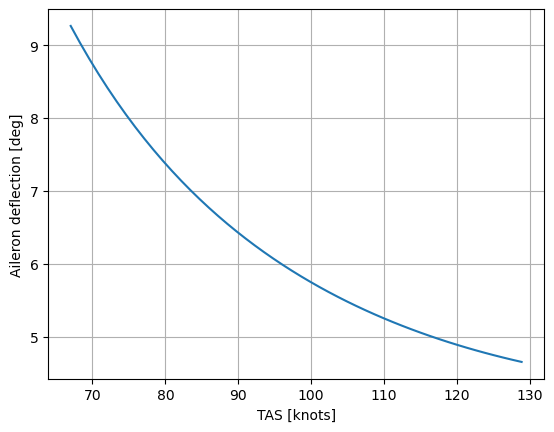

In [6]:
from matplotlib import pyplot as plt  # import the pyplot module from the matplotlib library

tas_knots_array = np.linspace(130, 250)  # create an array of true airspeeds from 130 to 250 knots
altitude_array = np.linspace(0, 6)  # create an array of altitudes from 0 to 6 km
tas_ms_array = tas_knots_array * (1/1.94)  # convert true airspeed from knots to m/s

xi_array = np.empty_like(tas_ms_array)  # create an empty array to store the aileron deflection values
for i in range(len(tas_ms_array)):
    xi_array[i] = aileron_deflection(tas_ms_array[i], altitude_array[i])  # calculate the aileron deflection at each point

plt.plot(tas_ms_array, xi_array)  # plot the aileron deflection as a function of true airspeed
plt.xlabel('TAS [knots]')  # set the x-axis label
plt.ylabel('Aileron deflection [deg]')  # set the y-axis label
plt.grid()  # add a grid to the plot
plt.show()  # display the plot